In [100]:
import plotly.express as px
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

In [101]:
df_train=pd.read_csv('Training.csv')

In [102]:
df_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [103]:
    df_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [104]:
df_train.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,2460.0,3.817480,3.296458,0.000,1.00000,3.000,6.000,17.00
Glucose,2460.0,121.602033,31.789270,0.000,100.00000,117.000,142.000,197.00
BloodPressure,2460.0,68.915041,19.082655,0.000,64.00000,70.000,80.000,122.00
SkinThickness,2460.0,20.531301,15.716901,0.000,0.00000,23.000,33.000,63.00
Insulin,2460.0,80.119919,116.765807,0.000,0.00000,36.000,129.000,846.00
BMI,2460.0,31.990447,7.802569,0.000,27.10000,32.100,36.500,67.10
DiabetesPedigreeFunction,2460.0,0.491440,0.363917,0.078,0.25175,0.381,0.647,2.42
Age,2460.0,32.821951,11.251208,21.000,24.00000,29.000,39.000,81.00
Outcome,2460.0,0.390244,0.487904,0.000,0.00000,0.000,1.000,1.00


In [105]:
from collections import Counter


In [106]:
Counter(df_train['Outcome'])

Counter({1: 960, 0: 1500})

<AxesSubplot:>

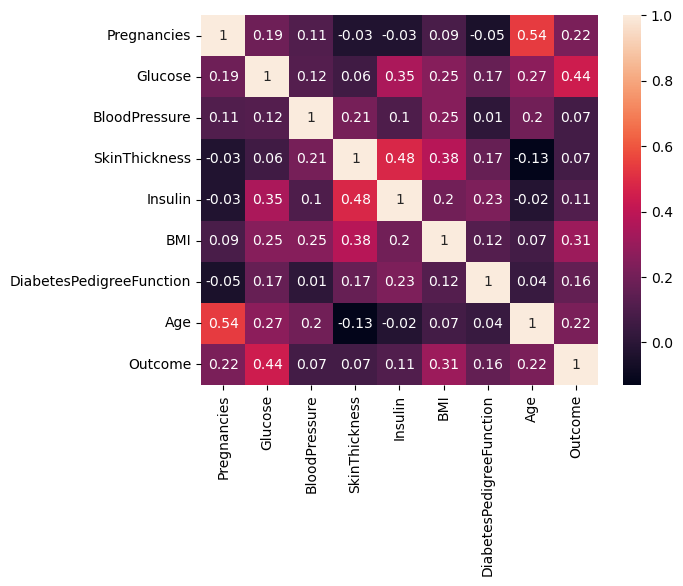

In [109]:

sns.heatmap(round(df_train.corr(),2),annot=True,fmt='0.5g')

In [110]:
px.box(df_train)

In [11]:
from imblearn.over_sampling import SMOTE

In [16]:
sm=SMOTE()

In [25]:
df_smote,y_smote=sm.fit_resample(df_train.drop(['Outcome'],axis=1),df_train['Outcome'])

In [28]:
Counter(y_smote)

Counter({1: 1500, 0: 1500})

In [29]:
from sklearn.preprocessing import StandardScaler

In [30]:
ss=StandardScaler()

In [31]:
X_scaled_train_smote=ss.fit_transform(df_smote)

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
lr=LogisticRegression()

In [35]:
model_lr=lr.fit(X_scaled_train_smote,y_smote)

In [37]:
model_lr.score(X_scaled_train_smote,y_smote)

0.7096666666666667

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rfc=RandomForestClassifier(n_estimators=100,max_depth=6)

In [40]:
rfc.fit(X_scaled_train_smote,y_smote)

RandomForestClassifier(max_depth=6)

In [41]:
rfc.score(X_scaled_train_smote,y_smote)

0.909

In [42]:
from sklearn.naive_bayes import GaussianNB

In [43]:
nb=GaussianNB()

In [44]:
nb.fit(X_scaled_train_smote,y_smote)

GaussianNB()

In [45]:
nb.score(X_scaled_train_smote,y_smote)

0.7066666666666667

In [46]:
from sklearn.svm import LinearSVC

In [47]:
svc=LinearSVC()

In [48]:
svc.fit(X_scaled_train_smote,y_smote)

C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



LinearSVC()

In [49]:
svc.score(X_scaled_train_smote,y_smote)

0.7106666666666667

In [50]:
from sklearn.ensemble import VotingClassifier

In [56]:
vc=VotingClassifier(estimators=[('rfc',rfc),('lr',lr),('svc',svc),('nb',nb)])

In [57]:
vc.fit(X_scaled_train_smote,y_smote)

C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning:

The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.

C:\Users\Samorjit\anaconda3\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



VotingClassifier(estimators=[('rfc', RandomForestClassifier(max_depth=6)),
                             ('lr', LogisticRegression()), ('svc', LinearSVC()),
                             ('nb', GaussianNB())])

In [58]:
vc.score(X_scaled_train_smote,y_smote)

0.7276666666666667

In [59]:
from sklearn.metrics import roc_auc_score,roc_curve,confusion_matrix,classification_report

In [60]:
df_test=pd.read_csv('Testing.csv')

In [61]:
X_test=df_test.drop(['Outcome'],axis=1)

In [62]:
y_test=df_test['Outcome']

In [63]:
X_test_scaled=ss.transform(X_test)

In [64]:
y_pred=rfc.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.89      0.77      0.82       215
           1       0.59      0.78      0.68        93

    accuracy                           0.77       308
   macro avg       0.74      0.78      0.75       308
weighted avg       0.80      0.77      0.78       308



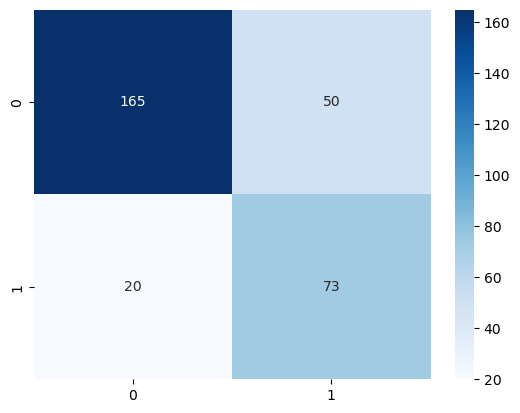

In [66]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap='Blues',annot=True,fmt='.5g')
print(classification_report(y_test,y_pred))

In [71]:
prob_test=rfc.predict_proba(X_test_scaled)

In [73]:
prob_test=prob_test[:,1]

In [76]:
roc_auc_score(y_test,prob_test)

0.8703675918979745

In [77]:
fpr, tpr, thresholds=roc_curve(y_test,prob_test)

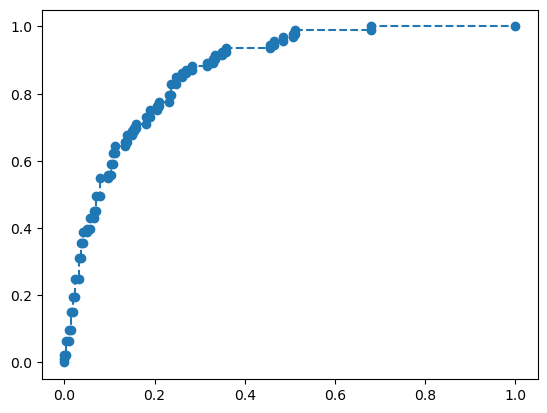

In [78]:
plt.plot(fpr,tpr,marker='o',linestyle='dashed')

In [86]:
ann=tf.keras.models.Sequential()

In [87]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [88]:
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [89]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [90]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [91]:
ann.fit(X_scaled_train_smote,y_smote,batch_size=48,epochs=100)

Epoch 1/100
63/63 [==============================] - 1s 1ms/step - loss: 0.7022 - accuracy: 0.6123
Epoch 2/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6490 - accuracy: 0.6530
Epoch 3/100
63/63 [==============================] - 0s 1ms/step - loss: 0.6090 - accuracy: 0.6783
Epoch 4/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5761 - accuracy: 0.6967
Epoch 5/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5518 - accuracy: 0.7070
Epoch 6/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7117
Epoch 7/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5247 - accuracy: 0.7230
Epoch 8/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5175 - accuracy: 0.7287
Epoch 9/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5124 - accuracy: 0.7230
Epoch 10/100
63/63 [==============================] - 0s 1ms/step - loss: 0.5084 - accuracy: 0.7250
Epoch 11/

63/63 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.8053
Epoch 84/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8110
Epoch 85/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4416 - accuracy: 0.8080
Epoch 86/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.8103
Epoch 87/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8057
Epoch 88/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4404 - accuracy: 0.8053
Epoch 89/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4403 - accuracy: 0.8080
Epoch 90/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4399 - accuracy: 0.8090
Epoch 91/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4396 - accuracy: 0.8093
Epoch 92/100
63/63 [==============================] - 0s 1ms/step - loss: 0.4384 - accuracy: 0.8087
Epoch 93/100


In [96]:
ann3=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=36,activation='relu',input_shape=(X_scaled_train_smote.shape[1],)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=36,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=36,activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])

In [98]:
ann3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [99]:
ann3.fit(X_scaled_train_smote,y_smote,batch_size=32,epochs=200,validation_data=(X_test_scaled,y_test))

Epoch 1/200
94/94 [==============================] - 2s 5ms/step - loss: 0.7276 - accuracy: 0.6170 - val_loss: 0.5652 - val_accuracy: 0.7630
Epoch 2/200
94/94 [==============================] - 0s 2ms/step - loss: 0.6091 - accuracy: 0.6797 - val_loss: 0.5285 - val_accuracy: 0.7597
Epoch 3/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5770 - accuracy: 0.7083 - val_loss: 0.5031 - val_accuracy: 0.7792
Epoch 4/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5466 - accuracy: 0.7123 - val_loss: 0.5026 - val_accuracy: 0.7727
Epoch 5/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7297 - val_loss: 0.4908 - val_accuracy: 0.7695
Epoch 6/200
94/94 [==============================] - 0s 2ms/step - loss: 0.5256 - accuracy: 0.7303 - val_loss: 0.4999 - val_accuracy: 0.7630
Epoch 7/200
94/94 [==============================] - 0s 3ms/step - loss: 0.5158 - accuracy: 0.7410 - val_loss: 0.4849 - val_accuracy: 0.7922
Epoch 8/200
9

Epoch 59/200
94/94 [==============================] - 0s 3ms/step - loss: 0.3148 - accuracy: 0.8677 - val_loss: 0.6529 - val_accuracy: 0.7338
Epoch 60/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3118 - accuracy: 0.8640 - val_loss: 0.6435 - val_accuracy: 0.7468
Epoch 61/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3180 - accuracy: 0.8587 - val_loss: 0.6613 - val_accuracy: 0.7532
Epoch 62/200
94/94 [==============================] - 0s 3ms/step - loss: 0.3065 - accuracy: 0.8663 - val_loss: 0.6626 - val_accuracy: 0.7532
Epoch 63/200
94/94 [==============================] - 0s 2ms/step - loss: 0.3152 - accuracy: 0.8633 - val_loss: 0.6472 - val_accuracy: 0.7305
Epoch 64/200
94/94 [==============================] - 0s 3ms/step - loss: 0.3165 - accuracy: 0.8643 - val_loss: 0.6770 - val_accuracy: 0.7110
Epoch 65/200
94/94 [==============================] - 0s 3ms/step - loss: 0.3105 - accuracy: 0.8667 - val_loss: 0.6546 - val_accuracy: 0.7435
Epoch 

94/94 [==============================] - 0s 2ms/step - loss: 0.2443 - accuracy: 0.9063 - val_loss: 0.7588 - val_accuracy: 0.7435
Epoch 117/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2531 - accuracy: 0.8987 - val_loss: 0.7571 - val_accuracy: 0.7240
Epoch 118/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2490 - accuracy: 0.8973 - val_loss: 0.7176 - val_accuracy: 0.7305
Epoch 119/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2775 - accuracy: 0.8877 - val_loss: 0.6785 - val_accuracy: 0.7630
Epoch 120/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8920 - val_loss: 0.6905 - val_accuracy: 0.7630
Epoch 121/200
94/94 [==============================] - 0s 3ms/step - loss: 0.2569 - accuracy: 0.8887 - val_loss: 0.7009 - val_accuracy: 0.7468
Epoch 122/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2508 - accuracy: 0.9010 - val_loss: 0.6701 - val_accuracy: 0.7500
Epoch 123/200

94/94 [==============================] - 0s 2ms/step - loss: 0.2360 - accuracy: 0.9027 - val_loss: 0.6780 - val_accuracy: 0.7597
Epoch 174/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2237 - accuracy: 0.9147 - val_loss: 0.6904 - val_accuracy: 0.7532
Epoch 175/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9120 - val_loss: 0.7099 - val_accuracy: 0.7532
Epoch 176/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 0.9093 - val_loss: 0.7141 - val_accuracy: 0.7500
Epoch 177/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.9137 - val_loss: 0.7152 - val_accuracy: 0.7403
Epoch 178/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9033 - val_loss: 0.7178 - val_accuracy: 0.7532
Epoch 179/200
94/94 [==============================] - 0s 2ms/step - loss: 0.2170 - accuracy: 0.9093 - val_loss: 0.7091 - val_accuracy: 0.7662
Epoch 180/200